Analysis on Diabetes Dataset PPT - https://drive.google.com/file/d/1kkjWlZbymNZy9cdCTVfNrAZ4_1nUZKc2/view?usp=sharing

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
path='/content/Diabetes dataset.xlsx'
data=pd.read_excel(path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.shape

(768, 9)

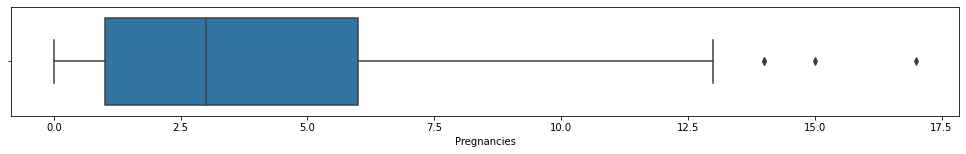

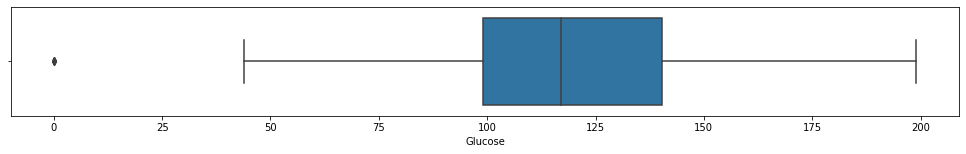

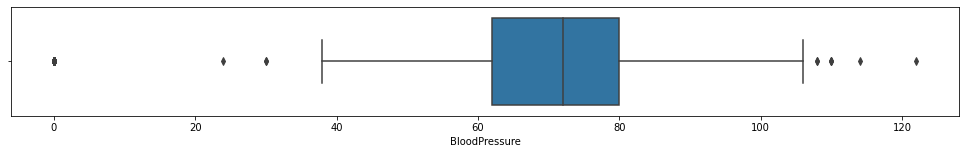

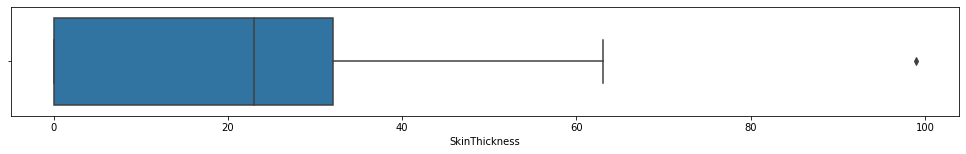

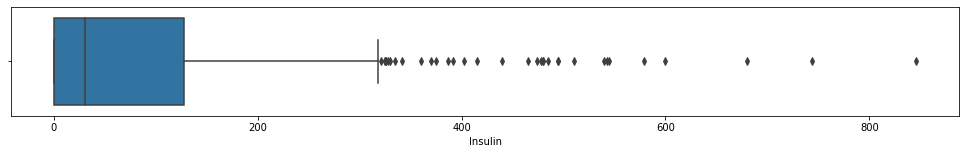

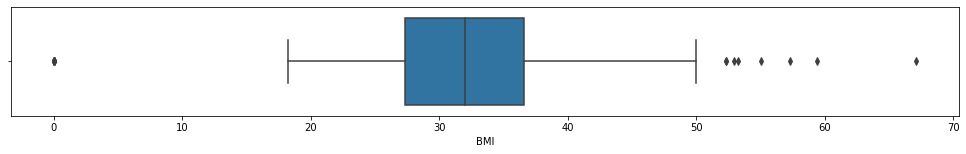

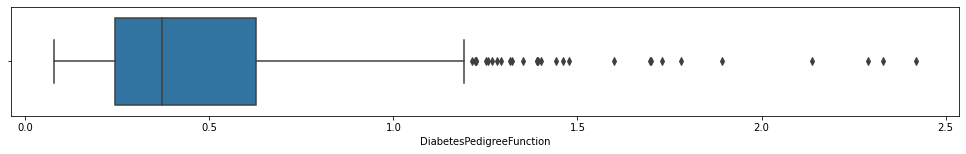

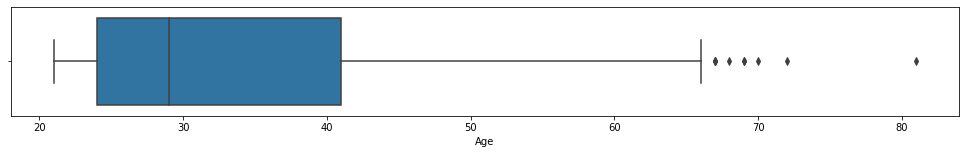

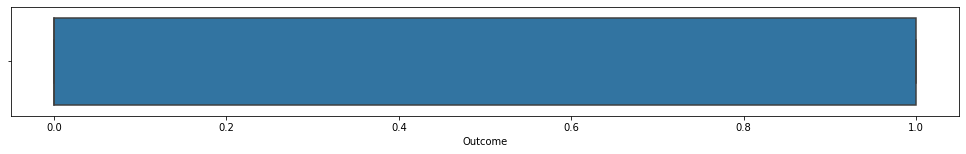

In [ ]:
for column in data:
    plt.figure(figsize=(17,2))
    sns.boxplot(data=data, x=column)

With univariate analysis, skin thickness was increased and significantly related to duration of diabetes (P less than .001), previous glycemic control (P less than .001), retinopathy (P less than .001), cheiroarthropathy (P less than .001), and vibration-perception threshold (P less than .05).

we observe that as the skinthickness level increases the more chance of
 getting diabetes

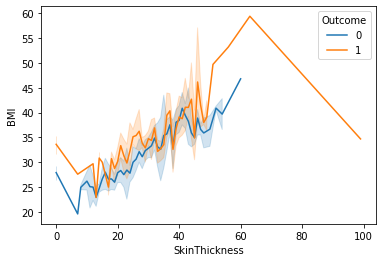

In [ ]:
sns.lineplot(x="SkinThickness",y="BMI",data=data,hue='Outcome')

As we observe that the more chance of cause diabetes during the age of 0-38

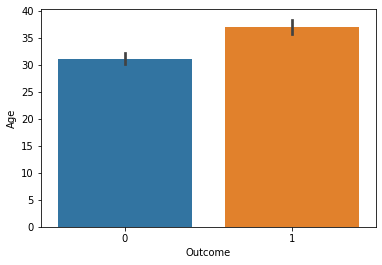

In [ ]:
sns.barplot(x="Outcome",y="Age",data=data)

In [ ]:
A=data.groupby("Outcome")["Outcome"].sum()
A

Outcome
0      0
1    268
Name: Outcome, dtype: int64

([<matplotlib.patches.Wedge at 0x7fae897f21c0>,
 [Text(1.0999244233124295, 0.012894301098527813, ''),
  Text(1.0996977036348738, 0.025786830363300053, ''),
  Text(1.099319872121373, 0.03867581620403265, ''),
  Text(1.0987909806905718, 0.0515594875173511, ''),
  Text(1.098111102018583, 0.06443607393016154, ''),
  Text(1.0972803295290035, 0.07730380604292164, ''),
  Text(1.0962987773800748, 0.09016091567277751, ''),
  Text(1.0951665804489967, 0.10300563609653363, ''),
  Text(1.0938838943133946, 0.11583620229342197, ''),
  Text(1.0908677801101303, 0.14144782189060576, ''),
  Text(1.0891347664932334, 0.1542253559429513, ''),
  Text(1.087252092516392, 0.16698169755613038, ''),
  Text(1.0852200168819026, 0.17971509385369816, ''),
  Text(1.0830388188216653, 0.19242379511217528, ''),
  Text(1.0782302747665373, 0.21776013082489973, ''),
  Text(1.0728291032698984, 0.2429767790903191, ''),
  Text(1.0668382729763135, 0.268059880088231, ''),
  Text(1.0602610766243679, 0.29299564739998485, ''),
  Te

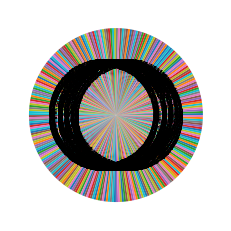

In [ ]:
plt.pie(data['Outcome'],autopct="%.2f%%")

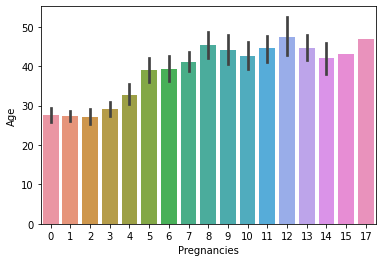

In [ ]:
sns.barplot(x="Pregnancies",y="Age",data=data)

the glucose level from 100-150 is more in Bmi level of 20-30

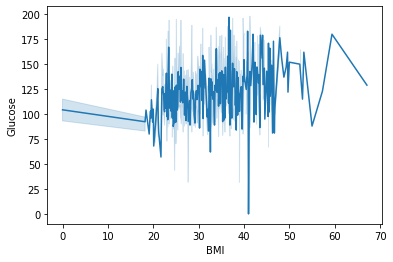

In [ ]:
sns.lineplot(x="BMI",y="Glucose",data=data)

the Blood pressure from 60-100 is  at the level of BMI 20-50

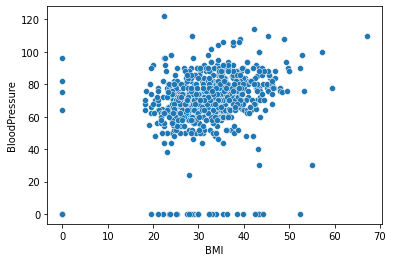

In [ ]:
sns.scatterplot(x="BMI",y="BloodPressure",data=data)

As the Blood Pressure increasing form 0 level the insulin level is increasing.

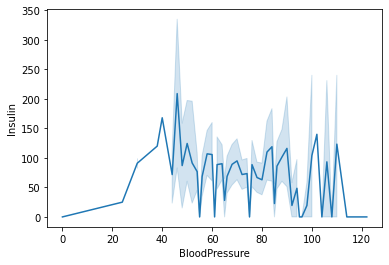

In [ ]:
sns.lineplot(x="BloodPressure",y="Insulin",data=data)

insights:The diabetes percentage started during the age of 20 & 30 and goes to peak stage during the age of 50-60.

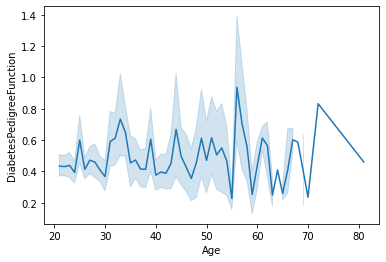

In [ ]:
sns.lineplot(x="Age",y="DiabetesPedigreeFunction",data=data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
print(normalized_data)

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [ ]:
normalized_data = pd.DataFrame(normalized_data, columns=data.columns)
print(normalized_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age